**Architecture **

<img src="http://drive.google.com/uc?export=view&id=12JomC2IswVbNGdE0IIvPpUk8vPjP-MBQ"  alt="artchtecture">


---



(1) Importing dependency

In [1]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import os

import numpy as np
np.random.seed(13)
import random
random.seed(13)

import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


(2) Get Data

In [2]:
base_dir = '/data/private/SU/bbchip13/chainsaw_classification/data/'
chainsaw_wav_dir = base_dir+'chainsaw/'
other_wav_dir = base_dir+'no_chainsaw/'

In [3]:
chainsaw_list = [chainsaw_wav_dir+filename for filename in os.listdir(chainsaw_wav_dir) 
                 if filename.endswith('.wav')]
chainsaw_list = sklearn.utils.shuffle(chainsaw_list)
chainsaw_list = chainsaw_list
chainsaw_list = chainsaw_list
chainsaw_labels = np.ones(len(chainsaw_list))

no_chainsaw_list = [other_wav_dir+filename for filename in os.listdir(other_wav_dir)
                    if filename.endswith('.wav')]
no_chainsaw_list = sklearn.utils.shuffle(no_chainsaw_list)
no_chainsaw_list = no_chainsaw_list
no_chainsaw_list = no_chainsaw_list
no_chainsaw_labels = np.zeros(len(no_chainsaw_list))

In [4]:
def load_wavs(filenames):
    return np.asarray([librosa.load(filename)[0] for filename in tqdm(filenames)])

### If you have lack of memory, Use this
#     wav = librosa.load(filenames[0])
#     wavs = np.zeros( (len(filenames), wav.shape[0]) )
#     for i, filename in enumerate(filenames):
#         wavs[i][:] = librosa.load(filename)[:]
#     return wavs

In [5]:
x_train_chainsaw, x_test_chainsaw, y_train_chainsaw, y_test_chainsaw \
    = train_test_split(chainsaw_list, chainsaw_labels, test_size = 0.33, random_state = 7)
x_train_no_chainsaw, x_test_no_chainsaw, y_train_no_chainsaw, y_test_no_chainsaw \
    = train_test_split(no_chainsaw_list, no_chainsaw_labels, test_size = 0.33, random_state = 7)

x_train_filenames = x_train_chainsaw+x_train_no_chainsaw
y_train = np.concatenate([y_train_chainsaw, y_train_no_chainsaw])

x_test_filenames = x_test_chainsaw+x_test_no_chainsaw
y_test = np.concatenate([y_test_chainsaw, y_test_no_chainsaw])

x_train_filenames, y_train = sklearn.utils.shuffle(x_train_filenames, y_train)
x_test_filenames, y_test = sklearn.utils.shuffle(x_test_filenames, y_test)

print('Load Train Data......')
x_train = load_wavs(x_train_filenames)
print('Load Test Data......')
x_test = load_wavs(x_test_filenames)

x_train = np.reshape(x_train, (*x_train.shape, 1))
y_train = np.reshape(y_train, (*y_train.shape, 1))
x_test = np.reshape(x_test, (*x_test.shape, 1))
y_test = np.reshape(y_test, (*y_test.shape, 1))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Load Train Data......



Load Test Data......



(2218, 110250, 1) (2218, 1) (1093, 110250, 1) (1093, 1)


(3) Create a sequential model

In [6]:
model=Sequential()

# Layer 1
model.add(Conv1D (kernel_size=3, filters=128, strides=3, padding='valid',
                  kernel_initializer='he_uniform', input_shape=x_train.shape[1:]))                  
model.add(BatchNormalization())
model.add(Activation('relu'))

# Layer 2
model.add(Conv1D (kernel_size=3, filters=128, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 3
model.add(Conv1D (kernel_size=3, filters=128, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 4
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 5
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 6
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 7
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 8
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 9
model.add(Conv1D (kernel_size=3, filters=256, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 10
model.add(Conv1D (kernel_size=3, filters=512, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=3, strides=3))

# Layer 11
model.add(Dropout(0.5))
model.add(Flatten())

# Layer 12
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 36750, 128)        512       
_________________________________________________________________
batch_normalization_1 (Batch (None, 36750, 128)        512       
_________________________________________________________________
activation_1 (Activation)    (None, 36750, 128)        0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36750, 128)        49280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 36750, 128)        512       
_________________________________________________________________
activation_2 (Activation)    (None, 36750, 128)        0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12250, 128)        0         
__________

(4) Compile 

In [7]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True),
              metrics=['accuracy'])

(5) Train

In [8]:
model_path = 'SampleCNN_check_point/'
os.makedirs(model_path, exist_ok=True)
model_filename = model_path+'{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", verbose=1, save_best_only=True)

# from keras.callbacks import EarlyStopping
# cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# model.fit(X, Y, validation_split=0.2, epochs=5000, batch_size=500,
#           callbacks=[EarlyStopping])

In [9]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.3, 
                 shuffle=True, callbacks = [checkpointer])

#   model.fit_tfrecord(epochs=100,
#                      initial_epoch=initial_epoch,
#                      steps_per_epoch=train_steps,
#                      validation_steps=val_steps,
#                      callbacks=[tensor_board, early_stopping,
#                                 checkpointer, csv_logger])

Train on 1552 samples, validate on 666 samples
Epoch 1/100
1552/1552 [==============================] - 33s 21ms/step - loss: 0.3130 - acc: 0.8769 - val_loss: 1.3046 - val_acc: 0.7117

Epoch 00001: val_loss improved from inf to 1.30455, saving model to SampleCNN_check_point/01-1.3046.hdf5
Epoch 2/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.2485 - acc: 0.9240 - val_loss: 0.1628 - val_acc: 0.9459

Epoch 00002: val_loss improved from 1.30455 to 0.16281, saving model to SampleCNN_check_point/02-0.1628.hdf5
Epoch 3/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.1486 - acc: 0.9510 - val_loss: 0.0863 - val_acc: 0.9655

Epoch 00003: val_loss improved from 0.16281 to 0.08627, saving model to SampleCNN_check_point/03-0.0863.hdf5
Epoch 4/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.1195 - acc: 0.9575 - val_loss: 0.0983 - val_acc: 0.9685

Epoch 00004: val_loss did not improve from 0.08627
Epoch 5/100
1552/1552 [====

1552/1552 [==============================] - 27s 17ms/step - loss: 0.0157 - acc: 0.9929 - val_loss: 0.1029 - val_acc: 0.9640

Epoch 00041: val_loss did not improve from 0.04730
Epoch 42/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0163 - acc: 0.9929 - val_loss: 0.0773 - val_acc: 0.9775

Epoch 00042: val_loss did not improve from 0.04730
Epoch 43/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0125 - acc: 0.9948 - val_loss: 0.0548 - val_acc: 0.9850

Epoch 00043: val_loss did not improve from 0.04730
Epoch 44/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0182 - acc: 0.9948 - val_loss: 0.1045 - val_acc: 0.9685

Epoch 00044: val_loss did not improve from 0.04730
Epoch 45/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0281 - acc: 0.9897 - val_loss: 0.0499 - val_acc: 0.9790

Epoch 00045: val_loss did not improve from 0.04730
Epoch 46/100
1552/1552 [==============================] - 27s 1

1552/1552 [==============================] - 27s 17ms/step - loss: 0.0061 - acc: 0.9981 - val_loss: 0.1079 - val_acc: 0.9745

Epoch 00084: val_loss did not improve from 0.04730
Epoch 85/100
1552/1552 [==============================] - 27s 17ms/step - loss: 8.4033e-04 - acc: 1.0000 - val_loss: 0.0879 - val_acc: 0.9805

Epoch 00085: val_loss did not improve from 0.04730
Epoch 86/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0842 - val_acc: 0.9805

Epoch 00086: val_loss did not improve from 0.04730
Epoch 87/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0897 - val_acc: 0.9805

Epoch 00087: val_loss did not improve from 0.04730
Epoch 88/100
1552/1552 [==============================] - 27s 17ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 0.9850

Epoch 00088: val_loss did not improve from 0.04730
Epoch 89/100
1552/1552 [==============================] - 2

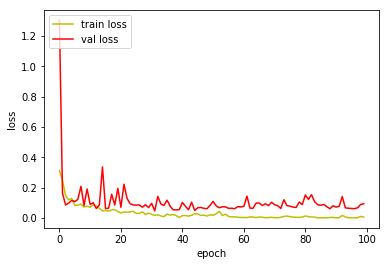

In [10]:
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

(6) Test

In [12]:
model = load_model(model_path+'32-0.0473.hdf5')

In [13]:
[loss, accuracy] = model.evaluate(x_test, y_test)
print('Loss:', loss, 'Accuracy:', accuracy)

1093/1093 [==============================] - 7s 6ms/step
Loss: 0.07264508801526906 Accuracy: 0.9780420860018298


In [14]:
pred = model.predict(x_test)
test_f1_score = f1_score(y_test, pred > 0.5)
print('F1 Score:', test_f1_score)

F1 Score: 0.9829059829059829


In [18]:
%timeit -n 5 -r 5 model.predict(x_test)

6.15 s ± 11.1 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)
